# **Wine Quality Prediction Project: A Predictive Analytics Framework**

## **Objective**
- To predict the quality of wines based on their chemical properties.
- The goal is to build a predictive model that can classify wine quality into categories (e.g., low, medium, high) using various machine learning techniques.



## **Data Collection**

In [29]:
import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, delimiter=';')

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **Data Exploration and Cleaning**

In [30]:
# Data overview
wine_data.info()
wine_data.describe()

# Check for missing values
wine_data.isnull().sum()

print(wine_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total

##  **Data Preparation**

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Bin the quality scores into three categories: low, medium, high
bins = [2, 5, 7, 9]  # Bins for low (3-4), medium (5-6), and high (7-8)
labels = ['low', 'medium', 'high']
wine_data['quality_label'] = pd.cut(wine_data['quality'], bins=bins, labels=labels, include_lowest=True)

# Feature selection (Remove original quality column from features)
X = wine_data.drop(columns=['quality', 'quality_label'])

# Target variable is now the binned quality labels
y = wine_data['quality_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  0   0   6]
 [  0 165  58]
 [  0  69 182]]

Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         6
         low       0.71      0.74      0.72       223
      medium       0.74      0.73      0.73       251

    accuracy                           0.72       480
   macro avg       0.48      0.49      0.48       480
weighted avg       0.71      0.72      0.72       480



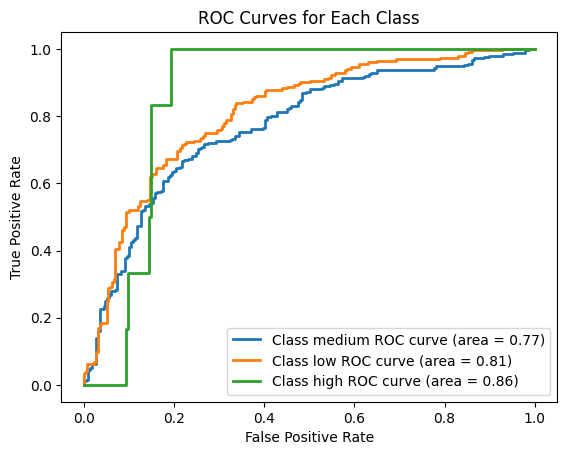

In [33]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for each class
y_pred_prob = log_reg.predict_proba(X_test)

# Calculate TPR and FPR for each class
for i in range(y_pred_prob.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test.apply(lambda x: 1 if x == y_test.unique()[i] else 0), y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {y_test.unique()[i]} ROC curve (area = {roc_auc:.2f})')

# Plotting the ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

## **Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  0   0   6]
 [  0 171  52]
 [  0  50 201]]

Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         6
         low       0.77      0.77      0.77       223
      medium       0.78      0.80      0.79       251

    accuracy                           0.78       480
   macro avg       0.52      0.52      0.52       480
weighted avg       0.77      0.78      0.77       480



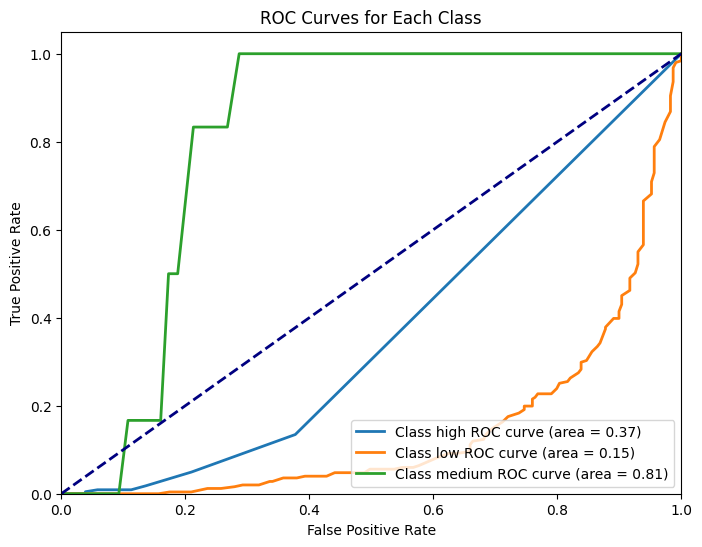

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Predict the probabilities on the test set
y_pred_prob = rf_model.predict_proba(X_test)

# Convert y_test to one-hot encoding if it's not already
y_test_one_hot = pd.get_dummies(y_test).values

# Plotting the ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(rf_model.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {rf_model.classes_[i]} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

## **SVM**

Confusion Matrix:
[[  0   0   6]
 [  0 170  53]
 [  0  78 173]]

Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         6
         low       0.69      0.76      0.72       223
      medium       0.75      0.69      0.72       251

    accuracy                           0.71       480
   macro avg       0.48      0.48      0.48       480
weighted avg       0.71      0.71      0.71       480



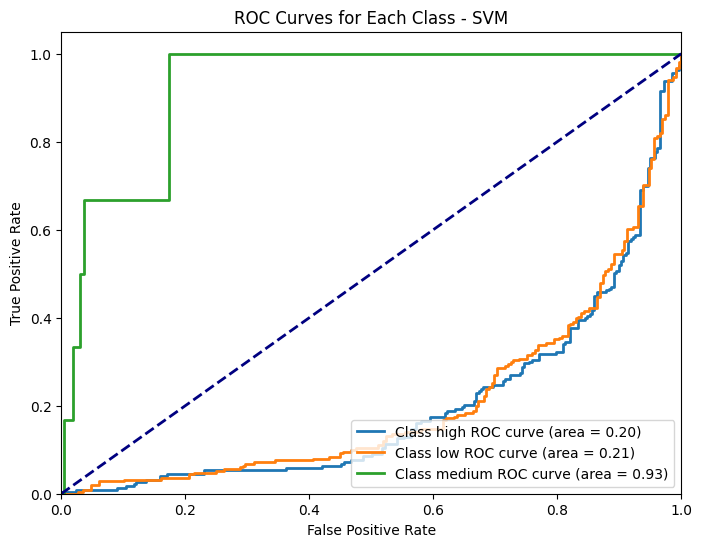

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Predict the probabilities on the test set
y_pred_prob = svm_model.predict_proba(X_test)

# Convert y_test to one-hot encoding if it's not already
y_test_one_hot = pd.get_dummies(y_test).values

# Plotting the ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(svm_model.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {svm_model.classes_[i]} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class - SVM')
plt.legend(loc="lower right")
plt.show()